In [ ]:
# Copyright 2018 United States Government as represented by the Administrator of
# the National Aeronautics and Space Administration. No copyright is claimed in
# the United States under Title 17, U.S. Code. All Other Rights Reserved.

# The Stochastic Reduced Order Models with Python (SROMPy) platform is licensed
# under the Apache License, Version 2.0 (the "License"); you may not use this
# file except in compliance with the License. You may obtain a copy of the
# License at http://www.apache.org/licenses/LICENSE-2.0.

# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.

# Stochastic Spring-Mass Sytem Example with SROMPy (1D)
This example will use SROMPy to simulate a spring-mass system with random spring stiffness. The example covers modeling the random stiffness using a Beta random variable in SROMPy, generating a SROM to represent the stiffness, then propagating uncertainty though the model to obtain the distribution for maximum displacement. The SROM solution will be compared to standard Monte Carlo simulation.

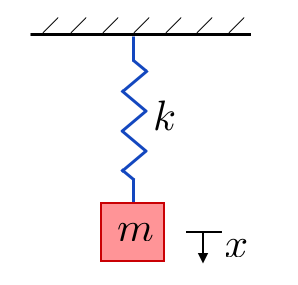

In [4]:
Image("spring_mass_diagram.png")

Governing equation:
<br>
$m\ddot{x} = -kx + mg $

In [2]:
import numpy as np

#import SROMPy modules
from model import SpringMass_1D
from postprocess import Postprocessor
from srom import SROM
from target import SampleRV, BetaRandomVariable 

In [3]:
#Specify spring-mass system:
m = 1.5                             #deterministic mass
state0 = [0., 0.]                   #initial conditions
t_grid = np.arange(0., 10., 0.1)    #time 

#random variable for spring stiffness
stiffness_rv = BetaRandomVariable(alpha=3., beta=2., shift=1., scale=2.5)

#Initialize model
model = SpringMass_1D(m, state0, t_grid)

Step 1) Generate an SROM for the random stiffness

In [4]:
#generate SROM for random stiffness - define SROM size with dimension=1 for scalar
sromsize = 10
dim = 1

srom = SROM(sromsize, dim)
srom.optimize(stiffness_rv)
(samples, probs) = srom.get_params()

SROM Sequential Optimizer:
	Iteration 1 Objective Function: 8.2670454435 Optimal: 8.2670454435
	Iteration 2 Objective Function: 18.8850728488 Optimal: 8.2670454435
	Iteration 3 Objective Function: 25.7421713546 Optimal: 8.2670454435
	Iteration 4 Objective Function: 20.1399596208 Optimal: 8.2670454435
	Iteration 5 Objective Function: 12.6210644911 Optimal: 8.2670454435
	Iteration 6 Objective Function: 20.0874031733 Optimal: 8.2670454435
	Iteration 7 Objective Function: 14.9874932876 Optimal: 8.2670454435
	Iteration 8 Objective Function: 12.5399715788 Optimal: 8.2670454435
	Iteration 9 Objective Function: 27.6079196985 Optimal: 8.2670454435
	Iteration 10 Objective Function: 9.87967580783 Optimal: 8.2670454435
	Iteration 11 Objective Function: 15.2437191741 Optimal: 8.2670454435
	Iteration 12 Objective Function: 14.1401980933 Optimal: 8.2670454435
	Iteration 13 Objective Function: 19.2293875427 Optimal: 8.2670454435
	Iteration 14 Objective Function: 15.9216522198 Optimal: 8.2670454435
	It

Step 2) Evaluate the model for each stiffness sample & save max displacement

In [5]:
#Run model to get max disp for each SROM stiffness sample
srom_disps = np.zeros(sromsize)
for i, stiff in enumerate(samples):
    srom_disps[i] = model.get_max_disp(stiff)

Step 3) Generate SROM for the max displacement solution

In [6]:
#Form new SROM for the max displacement solution using samples from the model   
srom_solution = SROM(sromsize, dim)
srom_solution.set_params(srom_disps, probs)